In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Exploratory Data Analysis

First we try to understand what kind of data we have, including how many rows and features. For features descriptions we used the official data dictionary from https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [4]:
df = pd.read_csv('diabetic_readmission_data.csv')
df.shape

(101766, 50)

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## Descriptive Statistics

Descriptive statistics of the dataset give us sense of how data behaviour is

In [6]:
df.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numerical Columns Distributions

In [7]:
num_df = df.select_dtypes(include = ['number'])
num_df.shape

(101766, 13)

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')


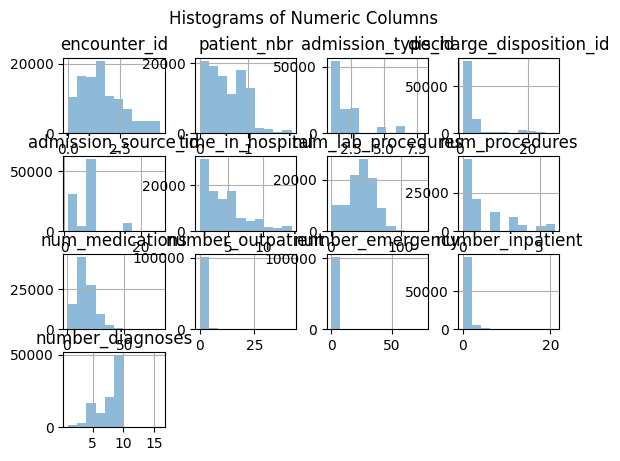

In [8]:
print(num_df.columns)
num_df.hist(alpha=0.5, bins=10)
plt.suptitle('Histograms of Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

encounter_id and patient_nbr are identifiers.
admission_type_id, discharge_disposition_id and admission_source_id are actually categorical features
Source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

## Categorical columns distributions

Here we analyze the distinct values that categorical features can take and its weight within the column

In [9]:
cat_columns = ['readmitted',
               'race',
               'gender',
               'age',
               'weight',
               'admission_type_id',
               'discharge_disposition_id',
               'admission_source_id',
               'payer_code',
               'medical_specialty',
               'max_glu_serum',
               'A1Cresult',
               'change',
               'diabetesMed']

for i in cat_columns:
    print(df[i].value_counts(normalize = True))

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64
race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64
age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64
weight
?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: proportion, dtype: float64
admission_type_id
1    0.530531
3    0.185416
2    0.181593
6    0.0519

# Missing values

In [10]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [11]:
(df == '?').sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Missing values are denoted with the '?' character

## Outliers detection

Here we just identify whether there are outliers or not in numerical features with boxplots. Treatment of outliers and missing values comes in Data manipulation step

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')


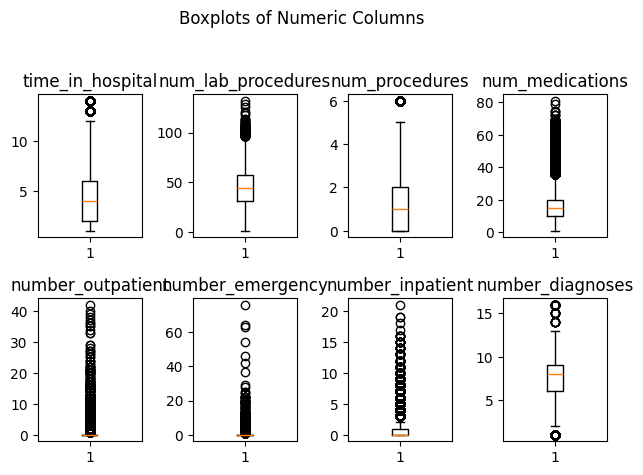

In [12]:
num_df.drop(['encounter_id', 
             'patient_nbr', 
             'admission_type_id',
             'discharge_disposition_id',
             'admission_source_id'], axis = 1,inplace = True)

print(num_df.columns)
fig, axes = plt.subplots(2, 4) 

axes_flat = axes.flatten()

for ax, column in zip(axes_flat, num_df.columns):
    ax.boxplot(num_df[column])
    ax.set_title(column)

plt.suptitle('Boxplots of Numeric Columns')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

# Data Manipulation

In [13]:
df[['encounter_id', 'patient_nbr']] = df[['encounter_id', 'patient_nbr']].astype(str)
df.dtypes


encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

## Missing values

In [14]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [15]:
(df == '?').sum() / df.shape[0]

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.395574
medical_specialty           0.490822
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
c

Missing values in max_glu_serum and A1Cresult are not realy missing values. Not measured was reported as None which is automatically a missing value for pandas library.
source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [16]:
df.fillna({'max_glu_serum': 'Not measured',
           'A1Cresult': 'Not measured'}, inplace=True)
df.isna().sum().value_counts()

0    50
Name: count, dtype: int64

weight and payer_code were removed because of the high percentage of missing values and the low explainability they may have with readmissions

In [17]:
df.drop(['weight', 'payer_code'], axis = 1, inplace=True)

In [18]:
df['race'].value_counts(normalize=True)

race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64

medical_specialty missing values are considered as a new category as it may be an informative feature for the target variable. This also happen with primary diagnosis and secondary diagnoses (missingness was replaced by "Missing")

In the case of race, as missing values were aproximately 2% of the values they were added to "Other"

In [19]:
df[['medical_specialty',
    'diag_1',
    'diag_2',
    'diag_3']] = df[['medical_specialty',
                     'diag_1',
                     'diag_2',
                     'diag_3']].apply(lambda x: x.str.replace('?', 'Missing'), axis = 1)

df['race'] = df['race'].str.replace('?', 'Other')
df = df.loc[(df['gender'] != 'Unknown/Invalid'),:]

In [20]:
(df == '?').sum() / df.shape[0]

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglita

## Outliers

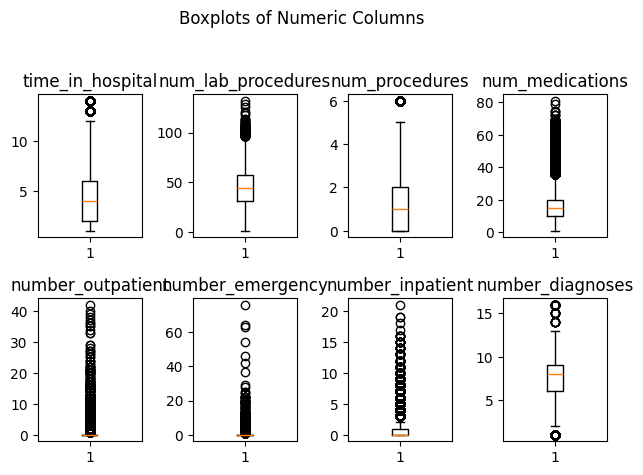

In [21]:
cat_columns = list(df.select_dtypes(object).columns)
cat_columns.extend(['admission_type_id',
                    'discharge_disposition_id',
                    'admission_source_id'])
df[cat_columns] = df[cat_columns].astype('category')
num_columns = list(df.select_dtypes(include = ['number']).columns)
num_df = df[num_columns]
fig, axes = plt.subplots(2, 4) # Adjust figure size as needed

# Flatten the 2D array of axes to make it iterable in a 1D fashion
axes_flat = axes.flatten()

# Iterate over the flattened axes array and the DataFrame columns together
for ax, column in zip(axes_flat, num_df.columns):
    ax.boxplot(num_df[column])
    ax.set_title(column)

plt.suptitle('Boxplots of Numeric Columns')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

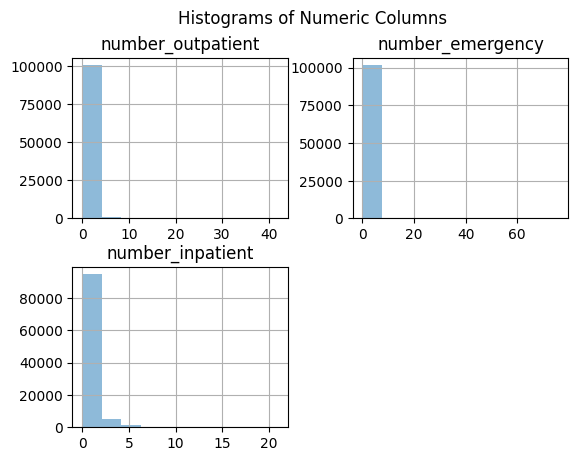

In [22]:
df[['number_outpatient',
    'number_emergency',
    'number_inpatient']].hist(alpha=0.5, bins=10)
plt.suptitle('Histograms of Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Outliers were removed with IQR method using alpha = 1.5
Due to the dstribution of number_outpatient, number_impatient and number_emergency it doesn't make sense to disrigard outliers with IQR method

In [23]:
no_iqr_considered = ['number_outpatient',
                     'number_emergency',
                     'number_inpatient']
quantiles = df[num_columns]\
    .drop(no_iqr_considered, axis = 1)\
    .quantile([0.25,0.75])
quantiles

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses
0.25,2.0,31.0,0.0,10.0,6.0
0.75,6.0,57.0,2.0,20.0,9.0


In [24]:
IQR = quantiles.loc[0.75] - quantiles.loc[0.25]
IQR

time_in_hospital       4.0
num_lab_procedures    26.0
num_procedures         2.0
num_medications       10.0
number_diagnoses       3.0
dtype: float64

In [25]:
print(f'Rows before removing outliers: {df.shape[0]}')
for i in quantiles.columns:
    df[i] = df[i].where(
        (df[i] <= quantiles[i][0.75] + IQR[i]*1.5) &
        (df[i] >= quantiles[i][0.25] - IQR[i]*1.5)
    )

df.dropna(inplace=True)
print(f'Rows after removing outliers: {df.shape[0]}')

Rows before removing outliers: 101763
Rows after removing outliers: 93075


In [26]:
df['readmitted'].value_counts(normalize=True)

readmitted
NO     0.535751
>30    0.352200
<30    0.112049
Name: proportion, dtype: float64

## Categorical features (encoding)

Target variable was encoded ordinally with 0 being not readmitted, 1 being readmitted within the first month and 2 afterwards

In [27]:
encode = {'NO': 0,
          '<30': 1,
          '>30': 2}

df['readmitted'] = df['readmitted'].replace(encode)
df['readmitted'] = df['readmitted'].astype(int)

Features with two distinct values such as diabetesMed and change (basically "Yes" and "No") were binary encoded: "Yes" = 1 and "No" = 0

In [28]:
#diabetesMed variable
encode = {'No': 0,
          'Yes': 1}

df['diabetesMed'] = df['diabetesMed'].replace(encode)

In [29]:
#change variable
encode = {'No': 0,
          'Ch': 1}

df['change'] = df['change'].replace(encode)

In [30]:
#gender variable
encode = {'Male': 0,
          'Female': 1}

df['gender'] = df['gender'].replace(encode)

For diag_1, diag_2 and diag_3 we will try two ways: embeddings and the replication of what an study on the HbA1c measurement impact in readmissions rate did, classifying by types of disease group (https://www.hindawi.com/journals/bmri/2014/781670/tab2/>)

### Embeddings

In [31]:
diag_codes = set(list(df["diag_1"]) + list(df["diag_2"]) + list(df["diag_3"]))
index2diag_code = list(diag_codes) # we want a list with indices
n_codes = len(diag_codes)
diag_code2index = { index2diag_code[i]:i for i in range(n_codes) }
co_occurrence = np.zeros((n_codes, n_codes))
frequencies = np.zeros((n_codes))

In [32]:
df.reset_index(drop=True, inplace=True)
for i in range(len(df)):
    diag_codes_for_row = []
    if df.loc[i,"diag_1"] != "?": diag_codes_for_row.append(df.loc[i,"diag_1"])
    if df.loc[i,"diag_2"] != "?": diag_codes_for_row.append(df.loc[i,"diag_2"])
    if df.loc[i,"diag_3"] != "?": diag_codes_for_row.append(df.loc[i,"diag_3"])
    for j1 in range(len(diag_codes_for_row)):
        code1 = diag_code2index[diag_codes_for_row[j1]]
        co_occurrence[code1][code1] += 1
        frequencies[code1] += 1
        for j2 in range(j1+1, len(diag_codes_for_row)):
            code2 = diag_code2index[diag_codes_for_row[j2]]
            co_occurrence[code1][code2] += 1
            co_occurrence[code2][code1] += 1

# We want the co_occdurrence to be a probability space (sum to one each row)
co_occurrence = co_occurrence / np.sum(co_occurrence, axis=1, keepdims=True)
#co_occurrence_scaled = (co_occurrence - np.mean(co_occurrence, axis=0)) / np.std(co_occurrence, axis=0)

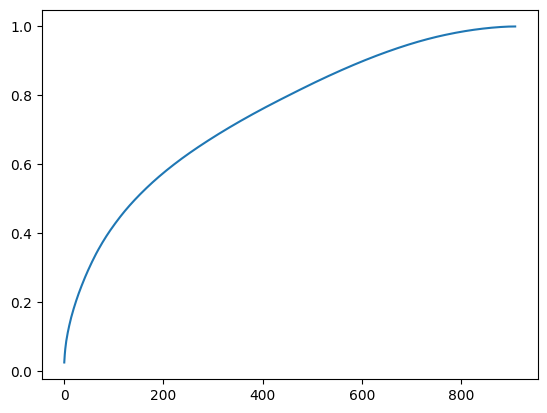

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(co_occurrence)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [34]:
## Embed to lower dimension, and then find nearest neighbors
## The idea is to verify that the co_occurrence representation (after PCA)
pca = PCA(n_components=400)
embeddings = pca.fit_transform(co_occurrence)
embeddings

array([[-0.06608055, -0.04983631,  0.12808669, ...,  0.00199378,
        -0.001986  ,  0.0049525 ],
       [-0.02576051, -0.01467887,  0.03159305, ...,  0.0210729 ,
        -0.01655721, -0.01298335],
       [-0.0180373 , -0.00852941,  0.00124629, ..., -0.01857431,
        -0.01805788, -0.01370192],
       ...,
       [-0.02206279, -0.02135293, -0.02363526, ..., -0.01921328,
         0.01285586, -0.01854486],
       [-0.01094523,  0.01697329, -0.03295555, ...,  0.00108725,
        -0.00508363, -0.00541508],
       [ 0.01408862,  0.10076878,  0.05943153, ..., -0.0097805 ,
        -0.02289914,  0.00628572]])

In [35]:
# Create a mapping from each diagnosis code to its corresponding average embedding
code_to_embedding = {code: embeddings[diag_code2index[code]] for code in diag_codes}

# Add embedding columns for diag_1, diag_2, and diag_3
#for col_name in ['diag_1', 'diag_2', 'diag_3']:
 #   df[f'{col_name}_embedding'] = df[col_name].map(code_to_embedding)
    
for col_name in ['diag_1', 'diag_2', 'diag_3']:
    embeddings = [code_to_embedding.get(code, None) for code in df[col_name]]
    df[f'{col_name}_embedding'] = embeddings


df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_embedding,diag_2_embedding,diag_3_embedding
0,149190,55629189,Caucasian,1,[10-20),1,1,7,3.0,Missing,...,No,No,No,No,1,1,2,"[-0.12468104011913476, -0.07044120056302562, 0...","[0.04238530468413746, -0.06101438401508885, -0...","[-0.03613437220184295, -0.03002241686601813, 0..."
1,64410,86047875,AfricanAmerican,1,[20-30),1,1,7,2.0,Missing,...,No,No,No,No,0,1,0,"[0.3771673064335978, -0.14788671834026543, 0.0...","[0.08710005926531675, 0.2646715448078219, 0.04...","[0.3192271070604589, -0.10997458476983393, 0.0..."
2,500364,82442376,Caucasian,0,[30-40),1,1,7,2.0,Missing,...,No,No,No,No,1,1,0,"[-0.054890177257126256, -0.033600771175446506,...","[-0.03652402719810844, -0.04439795625753285, 0...","[-0.047199670087618766, -0.039594875425685294,..."
3,16680,42519267,Caucasian,0,[40-50),1,1,7,1.0,Missing,...,No,No,No,No,1,1,0,"[-0.02308293414026362, -0.024831848895273942, ...","[-0.021215107027415983, -0.014918246108810847,...","[0.08710005926531675, 0.2646715448078219, 0.04..."
4,55842,84259809,Caucasian,0,[60-70),3,1,2,4.0,Missing,...,No,No,No,No,1,1,0,"[-0.011777249192346488, 0.030405935517673566, ...","[-0.012629815495965107, 0.014157132068509052, ...","[-0.01786488770695428, -0.005143285538778951, ..."


### HbA1c Study Classification

In the case of the diagnoses (diag_1, diag_2 and diag_3), before encoding them we needed to group the classification in a more friencly way, as the possible values it could originally were 1,000+. For this, we replicated what another research (HbA1c measurement impact in readmissions by Biomed) did.The research provides the codes that belong to concrete groups such as Circulatory, Respiratory, Digestive, etc. By having this reduced groups then we created the category Other that is composed with the categories that individually appeared in less than 3.5% of the observations
 
Source: https://www.hindawi.com/journals/bmri/2014/781670/tab2/>

In [36]:
groups_dict = {'Circulatory':'390-459, 785',
               'Respiratory':'460-519, 786',
               'Digestive':'520-579, 787',
               'Diabetes':'250',
               'Injury':'800-999',
               'Musculoskeletal':'710-739',
               'Genitourinary':'580-629, 788',
               'Neoplasms':'140-239',
               'Other symptons':'780, 781, 784, 790-799',
               'Endocrinal/Nutritional/Metabolic':'240-249, 251-279',
               'Skin':'680-709, 782',
               'Infectious and Parasites':'001-139',
               'Mental disorders':'290-319',
               'Blood':'280-289',
               'Nervous system':'320-359',
               'Pregancy issues':'630-679',
               'Sense organs':'360-389',
               'Congenital':'740-759',
               'Missing':'Mis'
               }

complete_codes = dict()
for key, value in groups_dict.items():
    codes = value.split(', ')
    for code in codes:
        if '-' in code:
            init = int(code.split('-')[0])
            end = int(code.split('-')[1])
            for i in range(init, end + 1):
                if len(str(i)) == 1:
                    complete_codes['00'+ str(i)] = key
                elif len(str(i)) == 2:
                    complete_codes['0'+ str(i)] = key
                else:
                    complete_codes[str(i)] = key      
        else:
            complete_codes[code] = key

complete_codes
    

{'390': 'Circulatory',
 '391': 'Circulatory',
 '392': 'Circulatory',
 '393': 'Circulatory',
 '394': 'Circulatory',
 '395': 'Circulatory',
 '396': 'Circulatory',
 '397': 'Circulatory',
 '398': 'Circulatory',
 '399': 'Circulatory',
 '400': 'Circulatory',
 '401': 'Circulatory',
 '402': 'Circulatory',
 '403': 'Circulatory',
 '404': 'Circulatory',
 '405': 'Circulatory',
 '406': 'Circulatory',
 '407': 'Circulatory',
 '408': 'Circulatory',
 '409': 'Circulatory',
 '410': 'Circulatory',
 '411': 'Circulatory',
 '412': 'Circulatory',
 '413': 'Circulatory',
 '414': 'Circulatory',
 '415': 'Circulatory',
 '416': 'Circulatory',
 '417': 'Circulatory',
 '418': 'Circulatory',
 '419': 'Circulatory',
 '420': 'Circulatory',
 '421': 'Circulatory',
 '422': 'Circulatory',
 '423': 'Circulatory',
 '424': 'Circulatory',
 '425': 'Circulatory',
 '426': 'Circulatory',
 '427': 'Circulatory',
 '428': 'Circulatory',
 '429': 'Circulatory',
 '430': 'Circulatory',
 '431': 'Circulatory',
 '432': 'Circulatory',
 '433': 'Ci

In [37]:
df[['diag_1',
    'diag_2',
    'diag_3']] = df[['diag_1',
                     'diag_2',
                     'diag_3']].apply(lambda x: x.str[0:3].map(complete_codes), axis=1)

df.fillna({'diag_1':'External causes',
           'diag_2':'External causes',
           'diag_3':'External causes'}, inplace = True)

In [38]:
for i in ['diag_1', 'diag_2', 'diag_3']:
    counts = pd.DataFrame(df[i].value_counts(normalize=True)).reset_index()
    counts = counts.loc[(counts['proportion'] < 0.035), :]
    df[i] = np.where(df[i].isin(counts[i]), 'Other', df[i])

For the encoding of the remaining features we opted for impact encoding except for those that were already encoded (such as admission_type_id, discharge_disposition_id and admission_source_id)

In [39]:
df.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace=True)
num_columns = df.select_dtypes(include=['float64', 'float32']).columns
num_columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses'],
      dtype='object')

In [66]:
cat_columns = df.drop(num_columns,axis=1).columns
impact_encode_columns = df[cat_columns].drop(['admission_type_id',
                                              'discharge_disposition_id',
                                              'admission_source_id',
                                              'change',
                                              'diabetesMed',
                                              'readmitted',
                                              'gender',
                                              'diag_1_embedding', 
                                              'diag_2_embedding',
                                              'diag_3_embedding',
                                             'number_outpatient',
                                             'number_emergency', 
                                             'number_inpatient'], axis = 1).columns
impact_encode_columns

Index(['race', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')

Impact encoding must be done with the averages computed from training set, this is way we split the dataset in this step

In [67]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.9, random_state=7)
print(f'Train observations = {train.shape[0]}')
print(f'Test observations = {test.shape[0]}')

Train observations = 83767
Test observations = 9308


In [68]:
for i in impact_encode_columns:
    group_df = train.groupby([i])['readmitted'].mean()
    train[i] = train[i].map(group_df)
    test[i] = test[i].map(group_df)
    df[i] = df[i].map(group_df)
    
df.head()

/var/folders/20/5mf5b61153b9n57c1ltynzf00000gn/T/ipykernel_2822/2276692951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_df = train.groupby([i])['readmitted'].mean()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_embedding,diag_2_embedding,diag_3_embedding
0,0.833347,1,0.733205,1,1,7,3.0,0.854328,59.0,0.0,...,0.816988,0.817026,0.81705,0.81705,1,1,2,"[-0.12468104011913476, -0.07044120056302562, 0...","[0.04238530468413746, -0.06101438401508885, -0...","[-0.03613437220184295, -0.03002241686601813, 0..."
1,0.805845,1,0.770907,1,1,7,2.0,0.854328,11.0,5.0,...,0.816988,0.817026,0.81705,0.81705,0,1,0,"[0.3771673064335978, -0.14788671834026543, 0.0...","[0.08710005926531675, 0.2646715448078219, 0.04...","[0.3192271070604589, -0.10997458476983393, 0.0..."
2,0.833347,0,0.734574,1,1,7,2.0,0.854328,44.0,1.0,...,0.816988,0.817026,0.81705,0.81705,1,1,0,"[-0.054890177257126256, -0.033600771175446506,...","[-0.03652402719810844, -0.04439795625753285, 0...","[-0.047199670087618766, -0.039594875425685294,..."
3,0.833347,0,0.782484,1,1,7,1.0,0.854328,51.0,0.0,...,0.816988,0.817026,0.81705,0.81705,1,1,0,"[-0.02308293414026362, -0.024831848895273942, ...","[-0.021215107027415983, -0.014918246108810847,...","[0.08710005926531675, 0.2646715448078219, 0.04..."
4,0.833347,0,0.826173,3,1,2,4.0,0.854328,70.0,1.0,...,0.816988,0.817026,0.81705,0.81705,1,1,0,"[-0.011777249192346488, 0.030405935517673566, ...","[-0.012629815495965107, 0.014157132068509052, ...","[-0.01786488770695428, -0.005143285538778951, ..."


In [43]:
#df.to_csv(r'../data/processed/diabetic_readmission_data_processed.csv', index=False)
#train.to_csv(r'../data/processed/diabetic_readmission_data_train.csv', index=False)
#test.to_csv(r'../data/processed/diabetic_readmission_data_test.csv', index=False)

## Scaling

In this step we perform standard scaling

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
no_scale = ['readmitted',
            'diag_1_embedding',
            'diag_2_embedding',
            'diag_3_embedding']
features = train.drop(no_scale, axis=1).columns
scaler.fit(train[features])

train_scaled = scaler.transform(train[features])
test_scaled = scaler.transform(test[features])
df_scaled = scaler.transform(df[features])

train_scaled = pd.DataFrame(train_scaled, columns=features)
test_scaled = pd.DataFrame(test_scaled, columns=features)
df_scaled = pd.DataFrame(df_scaled, columns=features)

train_scaled[no_scale] = train[no_scale].values
test_scaled[no_scale] = test[no_scale].values
df_scaled[no_scale] = df[no_scale].values

In [71]:
df_scaled.shape

(93075, 49)

## Feature Selection

### Without embeddings

Linear correlations

In [72]:
import seaborn as sns
train1 = train.drop(['diag_1_embedding',
                     'diag_2_embedding',
                     'diag_3_embedding'], axis = 1)
correlation_matrix = train1.corr()
correlations_with_readmitted = correlation_matrix['readmitted']
sorted_correlations = correlations_with_readmitted.abs().sort_values(ascending=False)

In [73]:
sorted_correlations[sorted_correlations >=.05]

readmitted           1.000000
number_inpatient     0.202550
number_emergency     0.120771
number_outpatient    0.108396
number_diagnoses     0.106276
medical_specialty    0.102392
num_medications      0.069738
insulin              0.066974
diag_1               0.062500
diabetesMed          0.060763
diag_2               0.058809
Name: readmitted, dtype: float64

Linear correlations between features

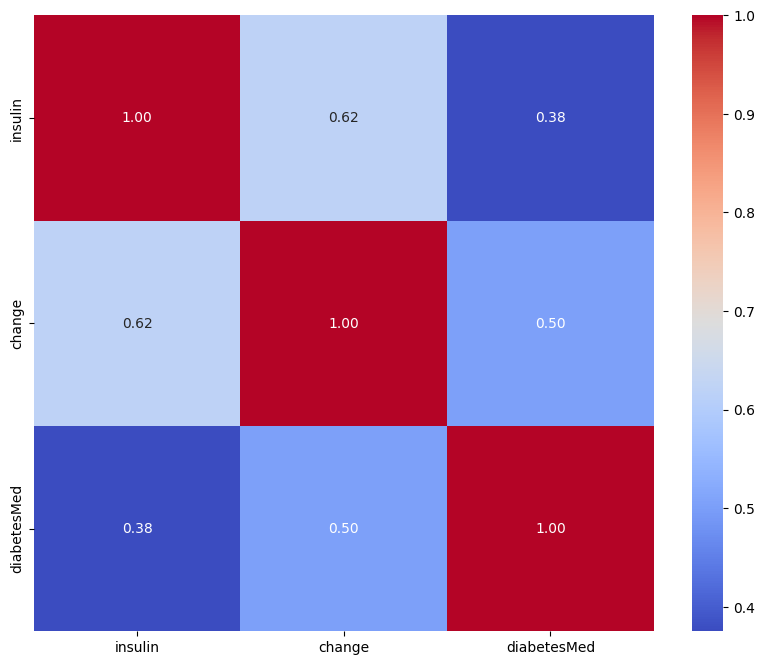

In [74]:
# Define the threshold for filtering
threshold = 0.5
high_corr = np.abs(correlation_matrix) >= threshold
# Ensure diagonal (self-correlation) is False so it doesn't affect the filter
np.fill_diagonal(high_corr.values, False)
# Identify columns that have at least one true value (high correlation)
columns_to_keep = high_corr.any()
# Filter the correlation matrix to keep only the columns (and rows) with high correlations
filtered_matrix = correlation_matrix.loc[columns_to_keep, columns_to_keep]

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(filtered_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

As linear relations with our target variable are not that strong we will base our feature selection on a non-linear method

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

X = train1.drop(['readmitted'], axis=1)
y = train1['readmitted']
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X, y)
tree_feature_selector = SelectFromModel(dt, prefit=True)
selected_features = X.columns[tree_feature_selector.get_support()]
selected_features           

Index(['race', 'age', 'admission_type_id', 'discharge_disposition_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'insulin'],
      dtype='object')

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf = rf.fit(X, y)
rf_feature_selector = SelectFromModel(rf, prefit=True)
selected_features_rf = X.columns[rf_feature_selector.get_support()]
selected_features_rf

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'insulin'],
      dtype='object')

# Model Training

In [77]:
from sklearn.ensemble import RandomForestClassifier
X_train = X[selected_features]
y_train = y
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
acc_train = rfc.score(X_train, y_train)
acc_test = rfc.score(test[selected_features], test['readmitted'])

print(acc_train)
print(acc_test)


1.0
0.567791147400086


In [78]:
#Approach using class weights
rfc = RandomForestClassifier(random_state=1, class_weight='balanced')
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
acc_train = rfc.score(X_train, y_train)
acc_test = rfc.score(test[selected_features], test['readmitted'])

print(acc_train)
print(acc_test)

1.0
0.5723033949290932


In [53]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X[selected_features], y)
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_resampled, y_resampled)
acc_train = rfc.score(X_resampled, y_resampled)
acc_test = rfc.score(test[selected_features], test['readmitted'])

print(acc_train)
print(acc_test)

1.0
0.5699398366996132


In [54]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X[selected_features], y)
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_resampled, y_resampled)
acc_train = rfc.score(X_resampled, y_resampled)
acc_test = rfc.score(test[selected_features], test['readmitted'])

print(acc_train)
print(acc_test)

1.0
0.45552213149978515


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X[selected_features], y)
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_resampled, y_resampled)
acc_train = rfc.score(X_resampled, y_resampled)
acc_test = rfc.score(test[selected_features], test['readmitted'])

print(acc_train)
print(acc_test)

0.7156528393850909
0.5783197249677696


In [56]:
X_train = X
y_train = y
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
acc_train = rfc.score(X_train, y_train)
acc_test = rfc.score(test.drop(['diag_1_embedding',
                                'diag_2_embedding',
                                'diag_3_embedding',
                                'readmitted'], axis=1), test['readmitted'])

print(acc_train)
print(acc_test)

1.0
0.5775676837129351


In [57]:
test.dropna(inplace=True)